# PyCon IT Attendee Analysis

This notebook analyzes the attendees of the PyCon IT conference for the years 2022, 2023, and 2024. 

The data includes only those who purchased tickets, filtering out any non-ticket items such as t-shirts and hotel bookings.

## Load and Process Data

The following function loads the data for a given year, filters for paid orders, and extracts the attendee emails for ticket items.


In [10]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from stats.colors import *

In [11]:
plt.rcParams["font.family"] = "General Sans"
plt.rcParams["font.size"] = 12
plt.rcParams['figure.facecolor'] = CREAM  # Default figure background color
plt.rcParams['axes.facecolor'] = CREAM  # Default axes background color
plt.rcParams['text.color'] = BLACK_INK           # Default text color
plt.rcParams['axes.labelcolor'] = BLACK_INK       # Default axes labels color
plt.rcParams['xtick.color'] = BLACK_INK           # Default x-tick color
plt.rcParams['ytick.color'] = BLACK_INK         # Default y-tick color
plt.rcParams['axes.titlecolor'] = BLACK_INK       # Default title color


In [12]:
def load_data(year) -> list[str]:
    """
    Load the JSON data for a given year, filter for paid orders, 
    and extract the attendee emails for ticket items.
    """
    data = json.loads(Path(f"./data/PyConIT {year} data.json").read_text())
    orders = [order for order in data["event"]["orders"] if order["status"] == "p"]
    ticket_ids = [item["id"] for item in data["event"]["items"] if "ticket" in item["name"].lower()]
    ticket_positions = [p for order in orders for p in order["positions"] if p["item"] in ticket_ids]
    
    return [p["attendee_email"] for p in ticket_positions]

In [13]:
# Load the data for each year
pycon_2025 = load_data(2025)
pycon_2024 = load_data(2024)
pycon_2023 = load_data(2023)
pycon_2022 = load_data(2022)

total_attendees_2022 = len(pycon_2022)
total_attendees_2023 = len(pycon_2023)
total_attendees_2024 = len(pycon_2024)
total_attendees_2025 = len(pycon_2025)

total_attendees_2025, total_attendees_2024, total_attendees_2023, total_attendees_2022

(1003, 824, 814, 675)

## New and returning attendees

We calculate the number of new and returning attendees 
for each year compared to the previous year.

In [14]:
unique_2022 = set(pycon_2022)
unique_2023 = set(pycon_2023)
unique_2024 = set(pycon_2024)
unique_2025 = set(pycon_2025)

new_attendees_2023 = len(unique_2023 - unique_2022)
new_attendees_2024 = len(unique_2024 - unique_2023)
new_attendees_2025 = len(unique_2025 - unique_2024)

# Returning attendees each year
returning_attendees_2023 = (
    total_attendees_2023 - new_attendees_2023
)
returning_attendees_2024 = (
    total_attendees_2024 - new_attendees_2024
)
returning_attendees_2025 = (
    total_attendees_2025 - new_attendees_2025
)

new_attendees_2025, new_attendees_2024, new_attendees_2023, returning_attendees_2025, returning_attendees_2024, returning_attendees_2023

(783, 628, 640, 220, 196, 174)

## Participants Breakdown by Year

We plot a stacked bar chart to show the number of new and returning participants for each year.

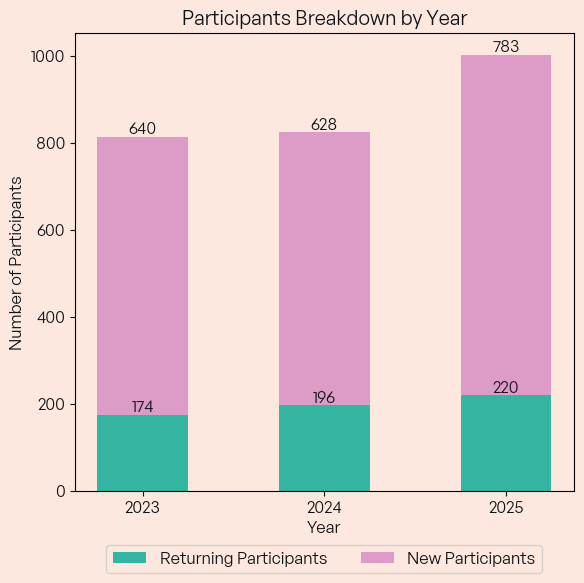

In [15]:
# Data for the stacked bar chart
years = ["2023", "2024", "2025"]
new_participants = [new_attendees_2023, new_attendees_2024, new_attendees_2025]
returning_participants = [returning_attendees_2023, returning_attendees_2024, returning_attendees_2025]

bar_width = 0.5

fig, ax = plt.subplots(figsize=(6, 6))

p1 = ax.bar(
    years,
    returning_participants,
    bar_width,
    label="Returning Participants",
    color=GREEN,
)
p2 = ax.bar(
    years,
    new_participants,
    bar_width,
    bottom=returning_participants,
    label="New Participants",
    color=PINK,
)

ax.set_title("Participants Breakdown by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Participants")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)

# Adding bar labels
for bar in p1:
    height = bar.get_height()
    ax.annotate(
        "{}".format(height),
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 0),  # 3 points vertical offset
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

for index, bar in enumerate(p2):
    height = bar.get_height() + returning_participants[index]
    ax.annotate(
        "{}".format(bar.get_height()),
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 0),  # 3 points vertical offset
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

fig.tight_layout()
plt.savefig("plots/pycon_2025_participants_breakdown_by_year.png", bbox_inches="tight")
plt.show()

## Total Number of Attendees Per Year

In this section, we plot the total number of attendees for each year. 

This visualization helps us understand the overall attendance trend over the years 2022, 2023, and 2024.


In [16]:
data_summary = {
    "Year": [2022, 2023, 2024, 2025],
    "Attendees": [len(pycon_2022), len(pycon_2023), len(pycon_2024), len(pycon_2025)],
}

df_summary = pd.DataFrame(data_summary)
df_summary.set_index("Year", inplace=True)
df_summary


,Attendees
Year,
2022,675
2023,814
2024,824
2025,1003


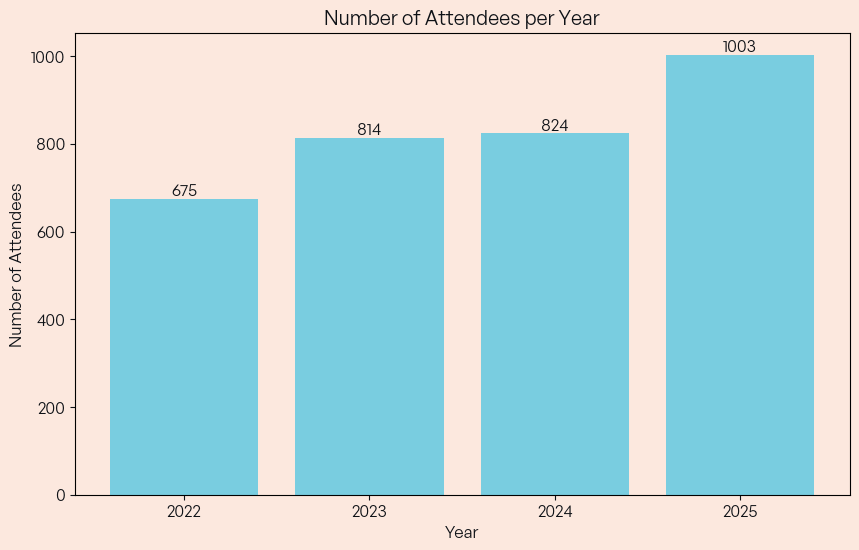

In [17]:
# Plot attendees per year
plt.figure(figsize=(10, 6))
bars = plt.bar(data_summary["Year"], df_summary["Attendees"], color=[BLUE])
plt.title("Number of Attendees per Year")
plt.xlabel("Year")
plt.ylabel("Number of Attendees")
plt.xticks(
    ticks=data_summary["Year"],
    labels=[int(year) for year in data_summary["Year"]],
    rotation=0,
)

plt.bar_label(bars)
plt.savefig("plots/pycon_2025_number_of_attendees_per_year.png", bbox_inches="tight")
plt.show()

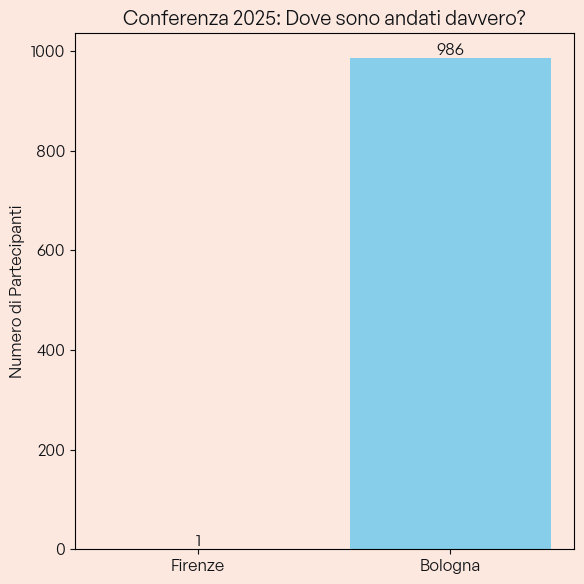

In [18]:

cities = ["Firenze", "Bologna"]
attendees = [1, 986]

plt.figure(figsize=(6, 6))
bars = plt.bar(cities, attendees, color=["salmon", "skyblue"])
plt.title("Conferenza 2025: Dove sono andati davvero?")
plt.ylabel("Numero di Partecipanti")
plt.bar_label(bars)
plt.tight_layout()
plt.show()
